In [ ]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [2]:
import jax
import jax.numpy as jnp
from camar import camar_v0

from camar.render import SVG_Visualizer

In [3]:
env = camar_v0("movingai", map_names=["street/Berlin_1_1024"])
obs, state = env.reset(jax.random.key(9))

SVG_Visualizer(env, state).save_svg("test4.svg")

In [9]:
env = camar_v0("labmaze_grid", num_maps=1, room_min_size=4, room_max_size=9, num_agents=32, max_rooms=-1, height=21, width=21, extra_connection_probability=0.4)
obs, state = env.reset(jax.random.key(9))

SVG_Visualizer(env, state).save_svg("test2.svg")

In [7]:
env = camar_v0("random_grid", num_agents=32, num_rows=20, num_cols=20, obstacle_density=0.15)
obs, state = env.reset(jax.random.key(9))

SVG_Visualizer(env, state).save_svg("test2.svg")

In [33]:
import labmaze


random_maze = labmaze.RandomMaze(max_rooms=-1, height=21, width=21, room_min_size=6, room_max_size=9, random_seed=0, extra_connection_probability=0.9)
print(str(random_maze.entity_layer))

*********************
*         ***********
* *     * ***********
*                   *
* *     * * * * *** *
*                 * *
* * * * *       * * *
*       *         * *
*       *       * * *
*                 * *
*       *       * * *
*                 * *
*       * * * * * * *
*                 * *
* * * * *       * * *
*                   *
* *     *       * ***
*                 ***
***     * * * * * ***
***               ***
*********************



In [ ]:
env = camar_v0(num_agents=32, obstacle_density=0.25, num_rows=20, num_cols=20)
obs, state = env.reset(jax.random.key(9))

SVG_Visualizer(env, state).save_svg("visualizations/camar_random_grid.svg")

TypeError: random_grid.__init__() got an unexpected keyword argument 'max_rooms'

In [39]:
from rrt import RRT
import matplotlib.pyplot as plt

In [4]:
env = camar_v0("caves_cont", num_agents=8)
obs, state = env.reset(jax.random.key(2))

SVG_Visualizer(env, state).save_svg()

In [121]:
rrt_ = RRT(env, 500_000, 0.05)

In [122]:
rrt_state = rrt_.run(jax.random.key(0), state.agent_pos, state.goal_pos, state.landmark_pos)
rrt_state.goal_reached

Array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [123]:
last_idx = rrt_.find_last_idx(rrt_state)

In [124]:
path_ids = []
for agent in range(rrt_.num_agents):
	agent_path = []
	i = int(last_idx[agent])
	while i != -1:
		agent_path.append(i)
		i = int(rrt_state.parent[i, agent])
	path_ids.append(agent_path[::-1])

In [125]:
svg_path = []
for agent, agent_path_id in enumerate(path_ids):
    path_id = agent_path_id[::-1]
    pos0 = rrt_state.pos[path_id[0], agent, :]

    svg_path_agent = ['<path d="']
    svg_path_agent.append(f'M {float(pos0[0]) :.3f} {float(pos0[1]) :.3f}')

    for pos_id in path_id[1:]:
        pos = rrt_state.pos[pos_id, agent, :]
        svg_path_agent.append(f'L {float(pos[0]) :.3f} {float(pos[1]) :.3f}')

    svg_path_agent.append(f'" stroke="hsla(0, 70%, 50%, 0.35)" stroke-width="{env.goal_rad * 2}" stroke-linecap="round" fill="transparent"/>')

    svg_path.append(' '.join(svg_path_agent))

In [126]:
print('\n'.join(svg_path))

<path d=" M -0.997 0.195 L -0.985 0.200 L -0.971 0.152 L -0.974 0.150 L -1.014 0.119 L -0.972 0.093 L -0.938 0.056 L -0.967 0.015 L -0.973 -0.034 L -0.939 -0.071 L -0.960 -0.116 L -0.927 -0.154 L -0.965 -0.186 L -0.946 -0.232 L -0.932 -0.280 L -0.892 -0.310 L -0.856 -0.345 L -0.809 -0.363 L -0.765 -0.386 L -0.718 -0.401 L -0.679 -0.369 L -0.643 -0.404 L -0.593 -0.398 L -0.548 -0.419 L -0.499 -0.429 L -0.449 -0.427 L -0.431 -0.380 L -0.395 -0.346 L -0.349 -0.327 L -0.304 -0.304 L -0.287 -0.257 L -0.286 -0.207 L -0.315 -0.166 L -0.321 -0.116 L -0.307 -0.068 L -0.328 -0.023 L -0.313 0.025 L -0.277 0.060 L -0.303 0.103 L -0.305 0.153 L -0.324 0.199 L -0.325 0.249 L -0.301 0.294 L -0.288 0.342 L -0.274 0.390 L -0.224 0.385 L -0.176 0.369 L -0.145 0.408 L -0.155 0.457 L -0.149 0.507 L -0.110 0.538 L -0.069 0.567 L -0.054 0.615 L -0.075 0.660 L -0.115 0.689 L -0.096 0.736 L -0.127 0.775 L -0.155 0.816 L -0.189 0.853 L -0.156 0.890 L -0.149 0.940 L -0.101 0.953 L -0.079 0.998 L -0.069 1.047 L 

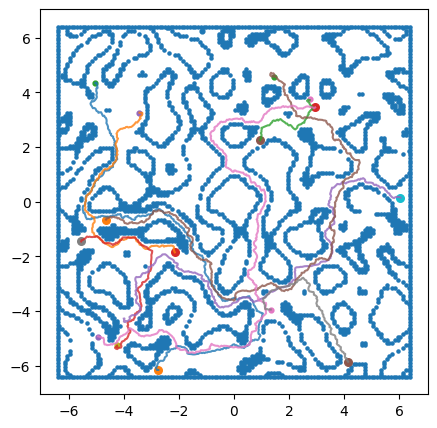

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(state.landmark_pos[:, 0], state.landmark_pos[:, 1], s=env.landmark_rad*100)
for agent_pos, goal_pos in zip(state.agent_pos, state.goal_pos):
    plt.scatter(agent_pos[0], agent_pos[1], s=env.agent_rad*300)
    plt.scatter(goal_pos[0], goal_pos[1], s=env.goal_rad*300)

for agent, agent_path_id in enumerate(path_ids):

	if len(agent_path_id) == 0:
		print(f"Path for {agent=} hasn't been found")
		continue

	x = rrt_state.pos[agent_path_id, agent, 0][::-1]
	y = rrt_state.pos[agent_path_id, agent, 1][::-1]

	plt.plot(x, y, lw=1.5, alpha=0.8)
	# plt.text(x[0], y[0], f"{agent}")
	# plt.text(x[-1], y[-1], f"{agent}")

In [46]:
dists = jnp.linalg.norm(state.landmark_pos[None, :, :] - state.landmark_pos[:, None, :], axis=-1)
idx1, idx2 = jnp.nonzero(jnp.logical_and(dists < env.landmark_rad * 2.1, dists > 0))
idx1, idx2

(Array([   0,    0,    0, ..., 1119, 1119, 1119], dtype=int32),
 Array([ 120,  415,  535, ...,  783, 1040, 1118], dtype=int32))

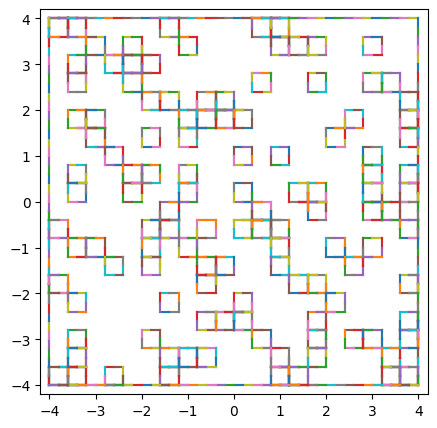

In [47]:
plt.figure(figsize=(5, 5))
# plt.scatter(state.landmark_pos[:, 0], state.landmark_pos[:, 1])
for i, (id1, id2) in enumerate(zip(idx1, idx2)):
    data = jnp.vstack((state.landmark_pos[id1], state.landmark_pos[id2]))
    plt.plot(data[:, 0], data[:, 1])
    plt.xlim(-4.2, 4.2)
    plt.ylim(-4.2, 4.2)
    # if i > 100:
    #     break

In [40]:
import labmaze

In [116]:
height = 33
width = 41
random_maze = labmaze.RandomMaze(height=height, width=width, max_rooms=-1, random_seed=0)
labmaze_str = str(random_maze.entity_layer)

In [117]:
camar_str = """
...................................
...................................
...................................
....@@@@..@@@..@...@..@@@..@@@@....
...@.....@...@.@@.@@.@...@.@...@...
...@.....@...@.@.@.@.@...@.@...@...
...@.....@@@@@.@...@.@@@@@.@@@@....
...@.....@...@.@...@.@...@.@.@.....
...@.....@...@.@...@.@...@.@..@....
....@@@@.@...@.@...@.@...@.@...@...
...................................
...................................
...................................

"""

camar_free_pos_str = """
...................................
...................................
...................................
....@@@@..@@@..@...@..@@@..@@@@....
...@.....@@@@@.@@.@@.@@@@@.@@@@@...
...@.....@@@@@.@.@.@.@@@@@.@@@@@...
...@.....@@@@@.@...@.@@@@@.@@@@....
...@.....@...@.@...@.@...@.@.@.....
...@.....@...@.@...@.@...@.@..@....
....@@@@.@...@.@...@.@...@.@...@...
...................................
...................................
...................................

"""

In [118]:
labmaze_str_ = labmaze_str.split("\n")
labmaze_free_pos_str_ = ["." * width for _ in range(height)]
camar_str_ = camar_str.split("\n")[1:]
camar_free_pos_str_ = camar_free_pos_str.split("\n")[1:]

up = 10
down = up + len(camar_str_) - 2
left = 3
right = 3

# assert down - up == len(camar_str_) - 1

map_str = labmaze_str_[:up]
free_pos_str = labmaze_free_pos_str_[:up]
for c_row, l_row in enumerate(range(up, down)):
    labmaze_left = labmaze_str_[l_row][:left]
    labmaze_right = labmaze_str_[l_row][-right:]
    labmaze_free_pos_left = labmaze_free_pos_str_[l_row][:left]
    labmaze_free_pos_right = labmaze_free_pos_str_[l_row][-right:]

    map_str.append(labmaze_left + camar_str_[c_row] + labmaze_right)
    free_pos_str.append(labmaze_free_pos_left + camar_free_pos_str_[c_row] + labmaze_free_pos_right)
map_str += labmaze_str_[down:]
free_pos_str += labmaze_free_pos_str_[down:]

map_str = "\n".join(map_str)
free_pos_str = "\n".join(free_pos_str)

In [120]:
env = camar_v0("string_grid", num_agents=16, map_str=map_str, free_pos_str=free_pos_str, add_border=False)
obs, state = env.reset(jax.random.key(4))

SVG_Visualizer(env, state).save_svg("visualizations/camar_main.svg")

In [74]:
env.num_landmarks

359

In [3]:
map_str = """
.....................................
.....................................
.....@@@@..@@@..@...@..@@@..@@@@.....
....@.....@...@.@@.@@.@...@.@...@....
....@.....@...@.@.@.@.@...@.@...@....
....@.....@@@@@.@...@.@@@@@.@@@@.....
....@.....@...@.@...@.@...@.@.@......
....@.....@...@.@...@.@...@.@..@.....
.....@@@@.@...@.@...@.@...@.@...@....
.....................................
.....................................
..@..@@@.......@@..@@@...@@@....@....
....@...@.....@...@...@.@...@...@....
..@.@.........@...@...@.@.....@@@@@..
..@..@@@....@@@@@.@@@@@..@@@....@....
..@.....@.....@...@...@.....@...@....
..@.@...@.....@...@...@.@...@...@....
..@..@@@......@...@...@..@@@....@....
.....................................
.....................................
..............@@@...@@@..............
.............@@@@@.@@@@@.............
.............@@@@@@@@@@@.............
..............@@@@@@@@@..............
...............@@@@@@@...............
................@@@@@................
.................@@@.................
..................@..................
.....................................
"""

In [4]:
env = camar_v0("string_grid", num_agents=32, map_str=map_str)
obs, state = env.reset(jax.random.key(4))

SVG_Visualizer(env, state).save_svg("images/string_grid_camar.svg")

In [ ]:
env = camar_v0()
for seed in [1, 2]:
    obs, state = env.reset(jax.random.key(seed))
    SVG_Visualizer(env, state).save_svg(f"images/random_grid_{seed}.svg")

In [6]:
map_str = """
.....#.....
.....#.....
...........
.....#.....
.....#.....
#.####.....
.....###.##
.....#.....
.....#.....
...........
.....#.....
"""
env = camar_v0("string_grid", num_agents=8, map_str=map_str)

for seed in [1, 2]:
    obs, state = env.reset(jax.random.key(seed))

    SVG_Visualizer(env, state).save_svg(f"images/string_grid_{seed}.svg")

In [7]:
map_str_batch = [
    """
.....#.....
.....#.....
...........
.....#.....
.....#.....
#.####.....
.....###.##
.....#.....
.....#.....
...........
.....#.....
""",
    """
..#....#...
..#....#...
.......##..
.......#...
..#....#...
..#....#...
..#....#...
..#........
.##........
..#....#...
..#....#...
""",
]
env = camar_v0("batched_string_grid", num_agents=8, map_str_batch=map_str_batch)

for seed in [1, 3]:
    obs, state = env.reset(jax.random.key(seed))
    SVG_Visualizer(env, state).save_svg(f"images/batched_string_grid_{seed}.svg")

In [8]:
env = camar_v0("labmaze_grid", num_maps=2, height=41, width=41, seed=0, num_agents=200,)

for seed in [0, 3]:
    obs, state = env.reset(jax.random.key(seed))
    SVG_Visualizer(env, state).save_svg(f"images/labmaze_grid_{seed}.svg")

In [9]:
env = camar_v0("movingai", map_names=["street/Milan_0_256", "bgmaps/AR0072SR"], height=128, width=128, num_agents=400,)

for seed in [0, 3]:
    obs, state = env.reset(jax.random.key(seed))
    SVG_Visualizer(env, state).save_svg(f"images/movingai_{seed}.svg")

In [10]:
env = camar_v0("caves_cont")

for seed in [2, 9]:
    obs, state = env.reset(jax.random.key(seed))
    SVG_Visualizer(env, state).save_svg(f"images/caves_cont_{seed}.svg")